# Лабораторная работа №6 по вычислительной математике
## Численное решение обыкновенных дифференциальных уравнений. Методы Рунге-Кутты. Методы Адамса.
### Выполнил Филиппенко Павел -- студент группы Б01-009

##### Задание VIII.11.2

In [30]:
import numpy as np
import matplotlib.pyplot as plt

Будем решать ОДУ второго порядка -- уравнение Ван-дер-Поля.

$$y'' + e(y^2 - 1)y' + y = 0$$

где $e > 0$ -- некоторый параметр. 
Представим данное уравнение второго порядка в виде 
системы двух уравнений первого порядка:

$$
\begin{cases}
\frac{dx}{dt} = z \\
\frac{dz}{dt} = e(1 - x^2)z - x
\end{cases}
$$

In [31]:
# set the "e" parametr in the equation
e = 0.9

In [32]:
def f(t, y: list) -> list:
    x = y[0]
    z = y[1]
    res = []
    res.append(z)
    res.append(e * (1 - x**2) * z - x)
    return res

# def f(S, t) -> list:
#     x, z = S
#     res = []
#     res.append(z)
#     res.append(e * (1 - x**2) * z - x)
#     return res

In [33]:
def MRK4(h, t_start, t_end, initial_solution):
    t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))
    # пока что пишем конкретно под систему из 2 уравнений
    solution = np.zeros((int((t_end-t_start)/h+1), 2))
    solution[0] = initial_solution

    for i in range(len(t) - 1):
        k1 = np.array(f(t[i], solution[i]))
        k2 = np.array(f(t[i] + h/2, solution[i] + h*k1 * 0.5))
        k3 = np.array(f(t[i] + h/2, solution[i] + h*k2 * 0.5))
        k4 = np.array(f(t[i] + h, solution[i] + h*k3))
        solution[i+1] = solution[i] + h*(k1 + 2*k2 + 2*k3 + k4) / 6
    return solution

In [34]:
# h = 0.01
# init_sol = np.array([2, 0])
# t_start = 0
# t_end = 100
# sol = MRK4(h, t_start, t_end, init_sol)
# z = np.array([item[1] for item in sol])
# x = np.array([item[0] for item in sol])
# t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))
# # plt.plot(t, z)
# plt.plot(x, z)

In [35]:
from scipy.integrate import odeint

In [36]:
# h = 0.01
# t_start = 0
# t_end = 100
# t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))

# sol = odeint(f, (2, 0), t)
# s1, s2 = sol.T
# plt.plot(t, s2)

In [37]:
def Adams_mthd4(h, t_start, t_end, initial_solution: tuple):
    t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))
    # пока что пишем конкретно под систему из 2 уравнений
    solution = np.zeros((int((t_end-t_start)/h+1), 2))
    for i in range(len(initial_solution)):
        solution[i] = initial_solution[i]
    
    for i in range(len(t)-4):
        solution[i+4] = solution[i+3] + h * (
            55/24 * np.array(f(t[i+3], solution[i+3])) - \
            59/24 * np.array(f(t[i+2], solution[i+2])) + \
            37/24 * np.array(f(t[i+1], solution[i+1])) - \
            3/8   * np.array(f(t[i], solution[i]))
        )
    return solution

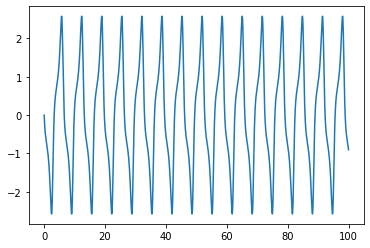

In [38]:
# для метода адамса первые 3 значения найдем с помощью метода РК
h = 0.01
init_sol = np.array([2, 0])
t_start = 0
t_end = 100
sol = MRK4(h, t_start, t_start+h*3, init_sol)
solution = Adams_mthd4(h, t_start, t_end, tuple(sol))
z = np.array([item[1] for item in solution])
x = np.array([item[0] for item in solution])
t = np.linspace(t_start, t_end, int((t_end-t_start)/h+1))
plt.plot(t, z)
# plt.plot(x, z)